<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/c%C3%B3digo/proyecto5_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máster MFIA

## Python - Proyecto 5 - Solución

Los siguiente es solo para comprobar que disponemos de las bibliotecas necesarias


In [1]:
modules = ["scipy", "tqdm", "stats"]

import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")
            try:
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules)

Instalando módulos
scipy  encontrado
tqdm  encontrado
stats  No encontrado, instalando...¡hecho!
¡Terminado!


**Ejercicio 1** Tenemos datos obtenidos de dos líneas A y B de una cadena de montaje (columna `Group`). En cada caso se mide el tiempo que se ha tardado en producir cada ítem (columna `valor`). Leer el fichero y mostrar un histograma de la columna `valor`, así como, en un diagrama distinto,  un diagrama de barras de la columna `Group`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/cadena.csv"

# lectura
df = pd.read_csv(url)
df


,valor,Group
0,72.458831,B
1,46.731278,A
2,46.717769,A
3,42.031432,A
4,77.888423,B
...,...,...
195,46.743748,A
196,52.631797,A
197,52.097753,A
198,68.195075,B


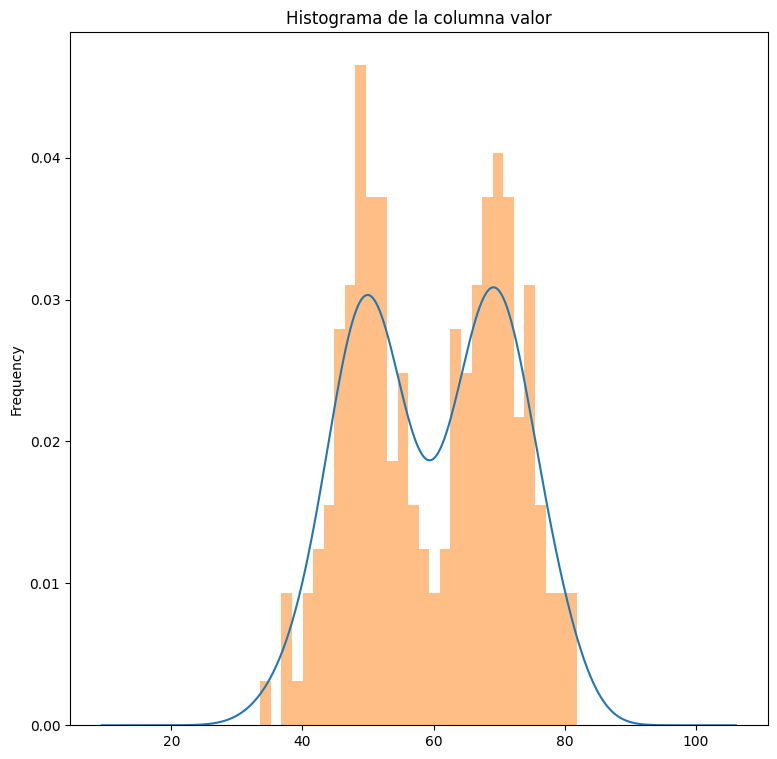

In [12]:
# histograma
def histo(df,columna,intervalos=30):
  eje = df[columna].plot(kind="density", figsize=(9,9))
  df[columna].plot(kind="hist", density=True, alpha=0.5, bins=intervalos, ax=eje)
  plt.title(f"Histograma de la columna {columna}")
  plt.show()

histo(df,"valor")

In [7]:
 df['Group'].value_counts().sort_index()

,count
Group,
A,100
B,100


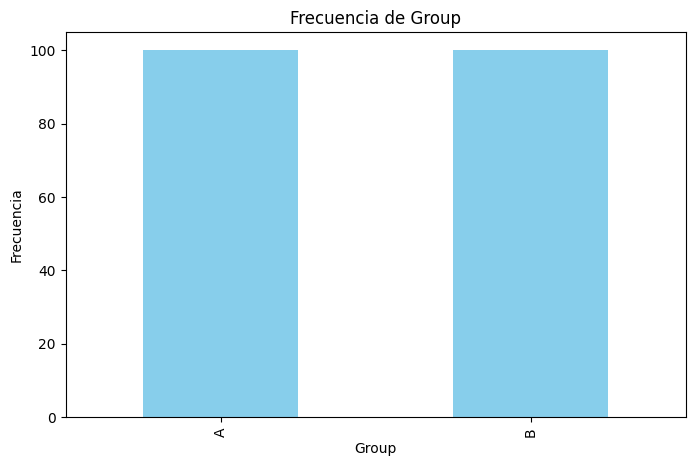

In [8]:
# diagrama de barras
frecuencias = df['Group'].value_counts().sort_index()

# Crear un diagrama de barras usando pandas
frecuencias.plot(kind='bar', figsize=(8, 5), color='skyblue', title='Frecuencia de Group')
plt.xlabel('Group')
plt.ylabel('Frecuencia')
plt.show()

 **Ejercicio 2** El histograma que acabamos de generar muestra dos "jorobas"; corresponde a una bimodal, una distribución que se puede dar, entre otras razones, porque estemos combinando dos distribuciones normales.

 Pensamos que quizás los dos "picos" que muestra el histograma correspondan a los dos valores de la columna `Group`. Para comprobarlo visualmente, crear dos dataframes `dfA` y `dfB` con los datos de df, restringidos al valor de `Group` A y B, respectivamente y mostrar el histograma de la columna `valor`de cada uno de ellos (a ser posible en la misma figura; no hace falta diagrama de densidad)

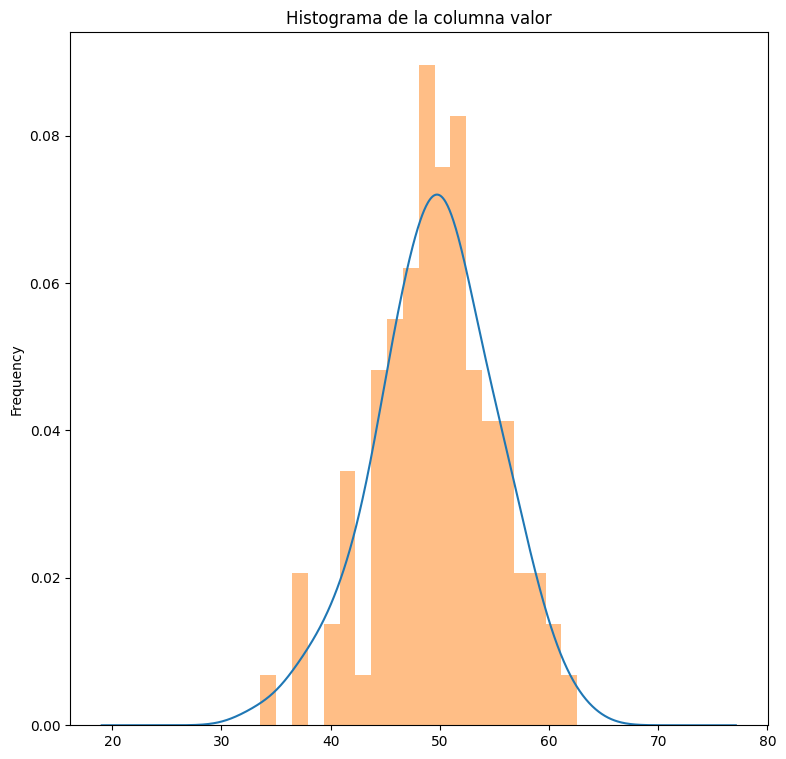

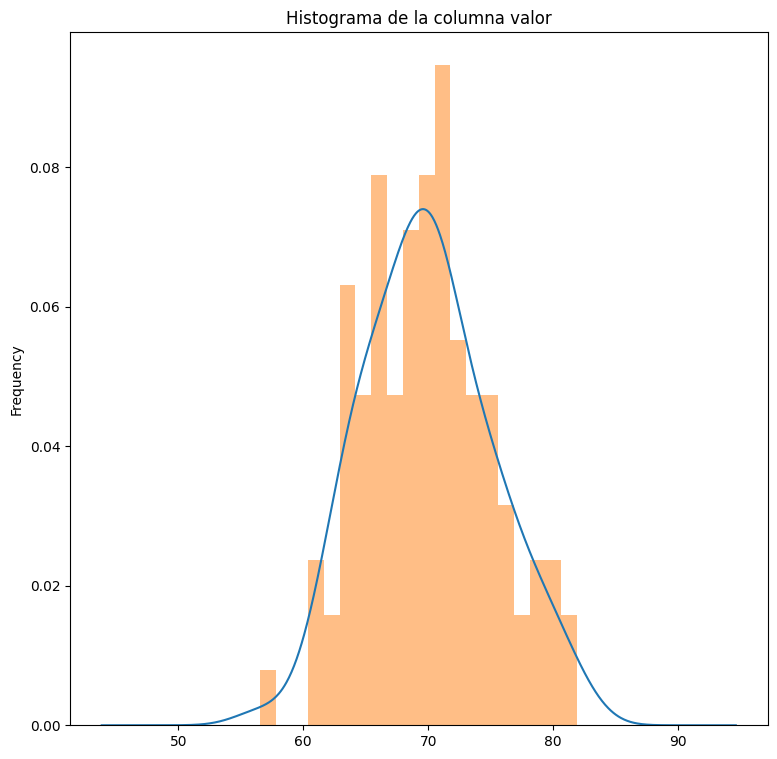

In [13]:
# solución
filtroA = df.Group=="A"
filtroB = df.Group=="B"

dfA = df[filtroA]
dfB = df[filtroB]

histo(dfA,"valor",20)
histo(dfB,"valor",20)


**Ejercicio 3** Pues sí que parece que tiene que ver... calcular la media de cada uno de los dos dataframes utilizando el teorema central del límite, repitiendo 10000 veces:

- Generar 2 muestras aleatorias, `ma` y `mb`, ambas de tamaño 50, una tomada de `dfA` y otra de `dfB`
- Calcular la media de la columna `valor` en cada una de las muestras y acumular con `append` el resultado en dos listas, `mediaA` y `mediaB` respectivamente (usar append, tal y como muestra el ejemplo en el notebook de teoría)

Al terminar el código que ya se proporciona convertirá ambas listas en un dataframe con dos columnas A y B (continuamos en el siguiente ejercicio)

In [27]:
from tqdm import tqdm
veces = 100000
muestra = 50


# solución
mediaA = []
mediaB = []
for i in tqdm(range(veces)):
  ma = dfA.sample(muestra)
  mb = dfB.sample(muestra)
  mediaA.append(ma.valor.mean())
  mediaB.append(mb.valor.mean())

# dejar este código sin tocar
df_medias = pd.DataFrame({"A":mediaA, "B":mediaB})
df_medias

100%|██████████| 100000/100000 [01:02<00:00, 1602.31it/s]


,A,B
0,48.713558,69.633188
1,50.014185,69.258155
2,49.247176,69.782575
3,48.691600,69.597605
4,49.276093,69.790702
...,...,...
99995,49.349036,70.394099
99996,49.163524,70.497959
99997,49.561976,70.261671
99998,50.078633,70.064308


**Ejercicio 4**

Mostrar el histograma de las columnas `A` y `B` del dataframe `df_medias`. Recordar que estamos viendo el resultado de 10000 experimentos que aproximan la muestra

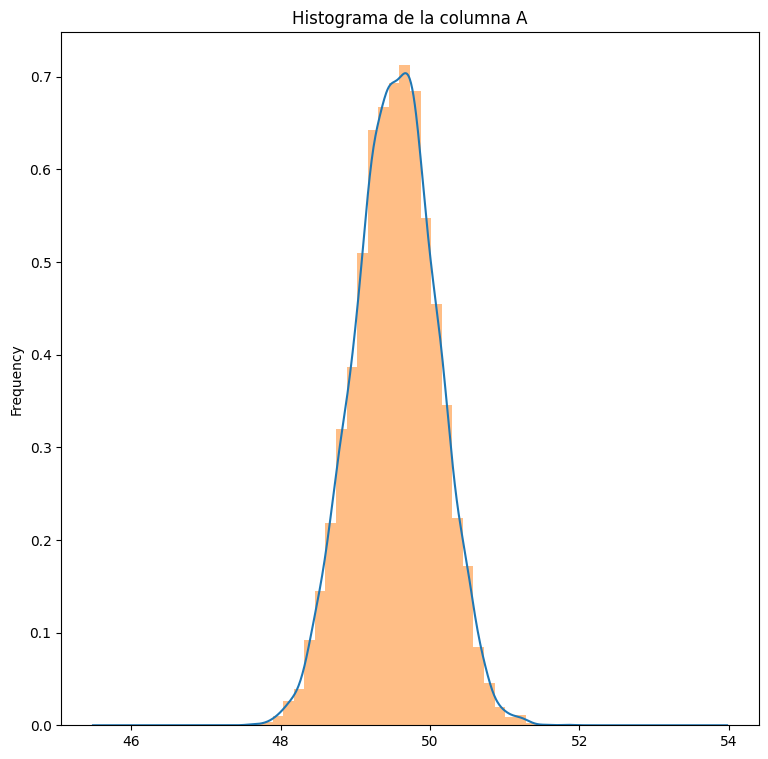

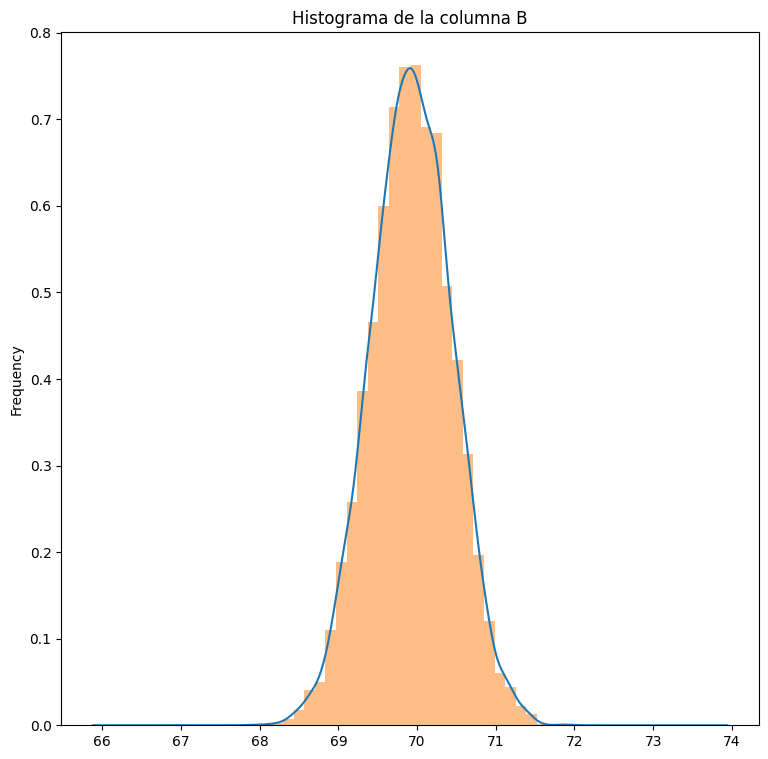

In [16]:
# solución
histo(df_medias,"A")
histo(df_medias,"B")


**Ejercicio 5** Repetir el gráfico doble anterior pero añadiéndole, para cada una de las dos columnas `A` y `B` del dataframe `df_medias`:

- Una línea vertical verde representando la media $\mu$ correspondiente (es decir la media de `A`en el histograma de `A`, la media de `B` en el histograma de `B`)
- Una linea vertical roja a $\mu-2\sigma$ y otra a $\mu +2\sigma$, con $\sigma$ la desviación típica, representando en cada caso la distancia de $2\sigma$ con respecto a la media.

Para ello partir del siguiente ejemplo tomado de otro notebook (hay que adaptarlo un poco)

    plt.axvline(media, color='red', linestyle='--', linewidth=2)


In [28]:
# solución
muA =df_medias.A.mean()
muB =df_medias.B.mean()
sigmaA =df_medias.A.std()
sigmaB =df_medias.B.std()

print(f"Media de A: {muA} (media total: {dfA.valor.mean()}) con int. confianza [ {muA-2*sigmaA:.3f}, {muA+2*sigmaA:.3f} ]")
print(f"Media de B: {muB} (media total: {dfB.valor.mean()}) con int. confianza [ {muB-2*sigmaB:.3f}, {muB+2*sigmaB:.3f} ]")



Media de A: 49.53932744475545 (media total: 49.53936529210852) con int. confianza [ 48.445, 50.634 ]
Media de B: 69.92964105103047 (media total: 69.92978583284453) con int. confianza [ 68.900, 70.959 ]





Media de A: 49.53932744475545 (media total: 49.53936529210852) con int. confianza [ 48.445, 50.634 ]
Media de B: 69.92964105103047 (media total: 69.92978583284453) con int. confianza [ 68.900, 70.959 ]

**Ejercicio 6**

En lugar de hacerlo "a mano" como en los ejercicios anteriores, probar a comprobar si las medias de A  y de B son diferentes con el método bootstrap de la librería stats.

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap

def mean_diff(data1, data2):
    return (data1.mean() - data2.mean())

# Bootstrapping para calcular la diferencia de medias
boot_result = bootstrap((dfA.valor, dfB.valor), mean_diff,  confidence_level=0.95)

# Resultados
print(f"Diferencia de medias: {mean_diff(dfA.valor, dfB.valor):.4f}")
print(f"Intervalo de confianza al 95%: [{boot_result.confidence_interval.low:.4f},{boot_result.confidence_interval.high:.4f}]")


Diferencia de medias: -20.3904
Intervalo de confianza al 95%: [-21.8534,-18.9113]
